In [1]:
import pandas as pd
df = pd.read_csv("C:/Users/ASUS/OneDrive/Documents/data science/DS Assignments/logistic reggr/bank-full-final.csv")
df
df.head()


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,term_deposit
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [2]:
df.shape

(42639, 17)

## Exploratory Data Analysis




In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42639 entries, 0 to 42638
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   age           42639 non-null  int64 
 1   job           42639 non-null  object
 2   marital       42639 non-null  object
 3   education     42639 non-null  object
 4   default       42639 non-null  object
 5   balance       42639 non-null  int64 
 6   housing       42639 non-null  object
 7   loan          42639 non-null  object
 8   contact       42639 non-null  object
 9   day           42639 non-null  int64 
 10  month         42639 non-null  object
 11  duration      42639 non-null  int64 
 12  campaign      42639 non-null  int64 
 13  pdays         42639 non-null  int64 
 14  previous      42639 non-null  int64 
 15  poutcome      42639 non-null  object
 16  term_deposit  42639 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.5+ MB


In [22]:
df.isnull().sum()

age                0
job                0
marital            0
education          0
default            0
balance            0
housing            0
loan               0
contact            0
day                0
month              0
duration           0
campaign           0
pdays              0
previous           0
poutcome           0
term_deposit       0
y_probabilities    0
dtype: int64

In [5]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,42639.000000,42639.000000,42639.000000,42639.000000,42639.000000,42639.000000,42639.000000
mean,40.788808,1331.863951,15.854781,255.957504,2.816412,34.169141,0.465442
std,10.200236,3011.537676,8.293901,258.361368,3.163564,92.041713,2.166705
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,62.000000,8.000000,101.000000,1.000000,-1.000000,0.000000
50%,39.000000,429.000000,16.000000,177.000000,2.000000,-1.000000,0.000000
75%,48.000000,1381.500000,21.000000,315.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,536.000000,275.000000


## Data Transformation

In [6]:
#separating continuous data for standardization
df_cont = df[df.columns[[0,5,9,11,12,13,14]]]
df_cont

,age,balance,day,duration,campaign,pdays,previous
0,58,2143,5,261,1,-1,0
1,44,29,5,151,1,-1,0
2,33,2,5,76,1,-1,0
3,47,1506,5,92,1,-1,0
4,33,1,5,198,1,-1,0
...,...,...,...,...,...,...,...
42634,21,2488,12,661,2,92,1
42635,87,2190,12,512,2,-1,0
42636,34,6718,13,278,4,97,1
42637,22,254,13,143,2,-1,0


In [7]:
#separating categorical data for labelencoding
df_cat = df[df.columns[[1,2,3,4,6,7,8,10,15]]]
df_cat

,job,marital,education,default,housing,loan,contact,month,poutcome
0,management,married,tertiary,no,yes,no,unknown,may,unknown
1,technician,single,secondary,no,yes,no,unknown,may,unknown
2,entrepreneur,married,secondary,no,yes,yes,unknown,may,unknown
3,blue-collar,married,unknown,no,yes,no,unknown,may,unknown
4,unknown,single,unknown,no,no,no,unknown,may,unknown
...,...,...,...,...,...,...,...,...,...
42634,student,single,secondary,no,no,no,telephone,jan,success
42635,retired,married,primary,no,no,no,telephone,jan,unknown
42636,blue-collar,married,primary,no,no,no,cellular,jan,other
42637,student,single,secondary,no,no,no,cellular,jan,unknown


In [8]:
#Standardization
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss = ss.fit_transform(df_cont)
xx = pd.DataFrame(ss)
xx.columns = list(df_cont)
xx

,age,balance,day,duration,campaign,pdays,previous
0,1.687352,0.269346,-1.308782,0.019517,-0.574173,-0.382105,-0.214818
1,0.314819,-0.432629,-1.308782,-0.406248,-0.574173,-0.382105,-0.214818
2,-0.763600,-0.441595,-1.308782,-0.696542,-0.574173,-0.382105,-0.214818
3,0.608933,0.057824,-1.308782,-0.634613,-0.574173,-0.382105,-0.214818
4,-0.763600,-0.441927,-1.308782,-0.224330,-0.574173,-0.382105,-0.214818
...,...,...,...,...,...,...,...
42634,-1.940057,0.383907,-0.464778,1.567755,-0.258070,0.628319,0.246717
42635,4.530457,0.284953,-0.464778,0.991036,-0.258070,-0.382105,-0.214818
42636,-0.665562,1.788521,-0.344206,0.085318,0.374136,0.682643,0.246717
42637,-1.842019,-0.357916,-0.344206,-0.437213,-0.258070,-0.382105,-0.214818


In [11]:
import warnings
with warnings.catch_warnings():
    # Setting values in-place is fine, ignore the warning in Pandas >= 1.5.0
    # This can be removed, if Pandas 1.5.0 does not need to be supported any longer.
    # See also: https://stackoverflow.com/q/74057367/859591
    warnings.filterwarnings(
        "ignore",
        category=FutureWarning,
        message=(
            ".*will attempt to set the values inplace instead of always setting a new array. "
            "To retain the old behavior, use either.*"
        ),
    )

pd.set_option('mode.chained_assignment', None)
import warnings
warnings.simplefilter(action='ignore', category=DeprecationWarning)

df_cat = df[df.columns[[1,2,3,4,6,7,8,10,15,16]]]      #labelencoding

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_cat.iloc[:,0]= le.fit_transform(df_cat.iloc[:,0])
df_cat.iloc[:,1]= le.fit_transform(df_cat.iloc[:,1])
df_cat.iloc[:,2]= le.fit_transform(df_cat.iloc[:,2])
df_cat.iloc[:,3]= le.fit_transform(df_cat.iloc[:,3])
df_cat.iloc[:,4]= le.fit_transform(df_cat.iloc[:,4])
df_cat.iloc[:,5]= le.fit_transform(df_cat.iloc[:,5])
df_cat.iloc[:,6]= le.fit_transform(df_cat.iloc[:,6])
df_cat.iloc[:,7]= le.fit_transform(df_cat.iloc[:,7])
df_cat.iloc[:,8]= le.fit_transform(df_cat.iloc[:,8])
df_cat.iloc[:,9]= le.fit_transform(df_cat.iloc[:,9])
df_cat


,job,marital,education,default,housing,loan,contact,month,poutcome,term_deposit
0,4,1,2,0,1,0,2,8,3,0
1,9,2,1,0,1,0,2,8,3,0
2,2,1,1,0,1,1,2,8,3,0
3,1,1,3,0,1,0,2,8,3,0
4,11,2,3,0,0,0,2,8,3,0
...,...,...,...,...,...,...,...,...,...,...
42634,8,2,1,0,0,0,1,4,2,1
42635,5,1,0,0,0,0,1,4,3,1
42636,1,1,0,0,0,0,0,4,1,0
42637,8,2,1,0,0,0,0,4,3,1


In [12]:
x = pd.concat([df_cont,df_cat],axis = 1)
x

,age,balance,day,duration,campaign,pdays,previous,job,marital,education,default,housing,loan,contact,month,poutcome,term_deposit
0,58,2143,5,261,1,-1,0,4,1,2,0,1,0,2,8,3,0
1,44,29,5,151,1,-1,0,9,2,1,0,1,0,2,8,3,0
2,33,2,5,76,1,-1,0,2,1,1,0,1,1,2,8,3,0
3,47,1506,5,92,1,-1,0,1,1,3,0,1,0,2,8,3,0
4,33,1,5,198,1,-1,0,11,2,3,0,0,0,2,8,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42634,21,2488,12,661,2,92,1,8,2,1,0,0,0,1,4,2,1
42635,87,2190,12,512,2,-1,0,5,1,0,0,0,0,1,4,3,1
42636,34,6718,13,278,4,97,1,1,1,0,0,0,0,0,4,1,0
42637,22,254,13,143,2,-1,0,8,2,1,0,0,0,0,4,3,1


In [13]:
y = df["term_deposit"]
y

0         no
1         no
2         no
3         no
4         no
        ... 
42634    yes
42635    yes
42636     no
42637    yes
42638     no
Name: term_deposit, Length: 42639, dtype: object

## Data Partition 

In [14]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.75)
x_train.shape
x_test.shape

(10660, 17)

## Building Model

In [15]:
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression(random_state=0, max_iter=10000)
lg.fit(x_train,y_train)
y_pred_train = lg.predict(x_train)
print(y_pred_train)
y_pred_test = lg.predict(x_test)
print(y_pred_test)


['no' 'yes' 'no' ... 'no' 'yes' 'no']
['no' 'no' 'no' ... 'no' 'no' 'no']


## Testing Accuracy And Other Metrics 

In [16]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_train,y_pred_train)
print("The training  accuracy_score of model is ",acc.round(4)*100)
acc = accuracy_score(y_test,y_pred_test)
print("The testing accuracy_score of model is ",acc.round(4)*100)

The training  accuracy_score of model is  100.0
The testing accuracy_score of model is  100.0


In [17]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_train,y_pred_train)
print("The confusion matrix of training model",cm)
cm = confusion_matrix(y_test,y_pred_test)
print("The confusion matrix of testing model",cm)


The confusion matrix of training model [[29009     0]
 [    0  2970]]
The confusion matrix of testing model [[9669    0]
 [   0  991]]


In [24]:
from sklearn.metrics import recall_score,precision_score,f1_score
f1score = f1_score(y_train,y_pred_train,pos_label="no")
print("f1_Score of model is:",f1score.round(3))
pscore = precision_score(y_train,y_pred_train,pos_label="yes")
print("precision_Score of model is:",pscore.round(3))
rscore = recall_score(y_train,y_pred_train,pos_label="no")
print("recall_Score of model is:",rscore.round(3))
TN = cm[0,0]
FP = cm[1,0]
TNR = TN/(TN + FP)
print("Specificity:", TNR.round(3))

f1_Score of model is: 1.0
precision_Score of model is: 1.0
recall_Score of model is: 1.0
Specificity: 1.0


In [19]:
df["y_probabilities"]=lg.predict_proba(x)[:,1]
df["y_probabilities"]

0        0.000263
1        0.000231
2        0.000220
3        0.000244
4        0.000402
           ...   
42634    0.997416
42635    0.993011
42636    0.001003
42637    0.995282
42638    0.000707
Name: y_probabilities, Length: 42639, dtype: float64

## ROC curve for label = "yes"

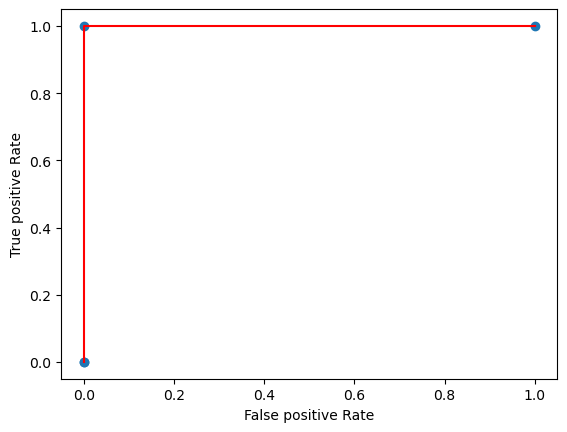

Area under curve: 100.0


In [20]:
import warnings
warnings.simplefilter('ignore')
from sklearn.metrics import roc_curve,roc_auc_score
fpr,tpr,dummy = roc_curve(y,df["y_probabilities"],pos_label="yes")

import matplotlib.pyplot as plt
plt.scatter(x = fpr,y=tpr)
plt.plot(fpr,tpr,color='red')
plt.ylabel("True positive Rate")
plt.xlabel("False positive Rate")
plt.show()

auc = roc_auc_score(y,df["y_probabilities"])
print("Area under curve:", (auc*100).round(3))



## ROC Curve for label="no"

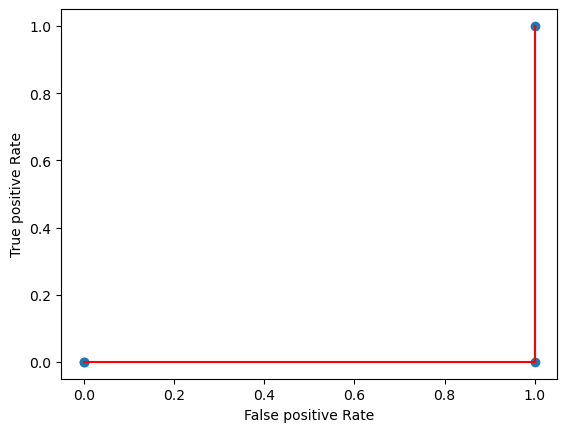

Area under curve: 100.0


In [21]:
from sklearn.metrics import roc_curve,roc_auc_score
fpr,tpr,dummy = roc_curve(y,df["y_probabilities"],pos_label="no")

import matplotlib.pyplot as plt
plt.scatter(x = fpr,y=tpr)
plt.plot(fpr,tpr,color='red')
plt.ylabel("True positive Rate")
plt.xlabel("False positive Rate")
plt.show()

auc = roc_auc_score(y,df["y_probabilities"])
print("Area under curve:", (auc*100).round(3))

